<a href="https://colab.research.google.com/github/aparna-2001/machine_learning_practice/blob/main/Linear_Regression_complete_brain_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from scipy.stats import zscore
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.sandbox.regression.predstd import wls_prediction_std

**Preliminary data check**

In [37]:
data = pd.read_csv('headbrain.csv')
data.shape

(237, 4)

In [38]:
data.head(10)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


* No missing values

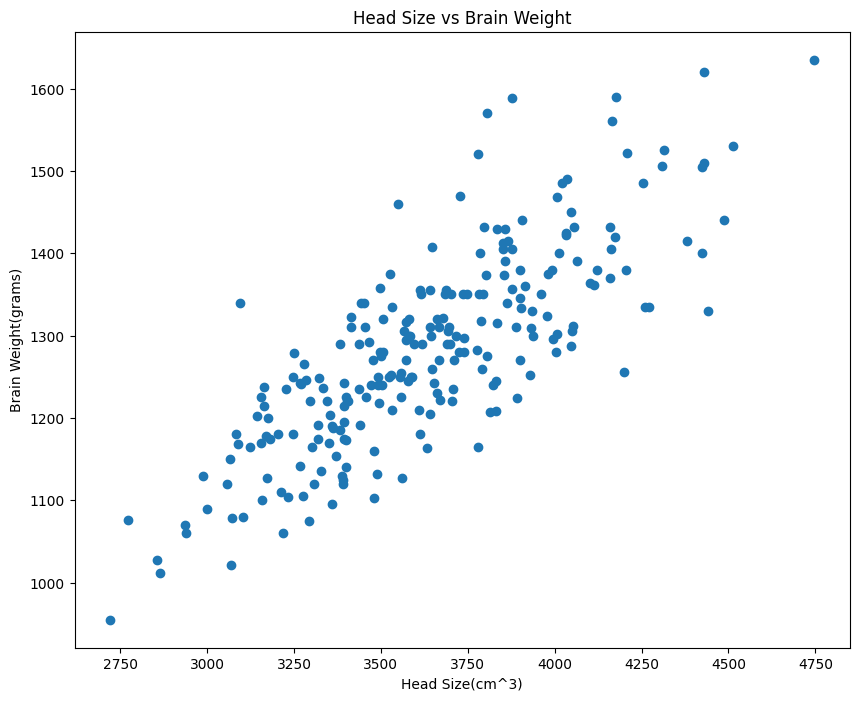

In [40]:

plt.figure(figsize=( 10,8))
plt.scatter(data['Head Size(cm^3)'], data['Brain Weight(grams)'])
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.title('Head Size vs Brain Weight')
plt.show()

**Model Training**

In [41]:
x = sm.add_constant(data['Head Size(cm^3)'])
y = data['Brain Weight(grams)']

In [42]:
train_x, test_x, train_y, test_y = train_test_split(x,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 100)

In [43]:
data_OLS = sm.OLS(train_y, train_x).fit()
data_OLS.params

,0
const,324.803207
Head Size(cm^3),0.264378


**Best fitting line**



*   Brain Weight(grams) = 0.264378 * Head Size(cm^3) + 	324.803207



**Model Diagnostics**



*   R squared value
*   Root Mean Squared Error (RMSE)
*   ANOVA
*   Residual analysis
*   Outlier analysis



In [44]:
data_OLS.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS                 Adj. R-squared:     0.623    
Dependent Variable: Brain Weight(grams) AIC:                2162.0239
Date:               2026-02-16 16:42    BIC:                2168.5074
No. Observations:   189                 Log-Likelihood:     -1079.0  
Df Model:           1                   F-statistic:        311.3    
Df Residuals:       187                 Prob (F-statistic): 1.17e-41 
R-squared:          0.625               Scale:              5382.3   
---------------------------------------------------------------------
                    Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
---------------------------------------------------------------------
const              324.8032  54.6684  5.9413 0.0000 216.9571 432.6493
Head Size(cm^3)      0.2644   0.0150 17.6434 0.0000   0.2348   0.2939
---------------------------------------------------------------------
Omnibus:                8.040         Durbin-Watson:            1.702
Prob(Omnibus):          0.018         Jarque-Bera (JB):         9.165
Skew:                   0.346         Prob(JB):                 0.010
Kurtosis:               3.827         Condition No.:            37375
=====================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors
is correctly specified.
[2] The condition number is large, 3.74e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""



*   The R-squared value is 0.625, thus this model explains the 62% of the variance in brain weight
*   The p value is 0.0000, which is less than 0.1, therefore there is a statistically significant relationship between head size and brain weight
*  The F statistic is also 0.0000, that is the model is statistically significant.

**Residual Analysis**

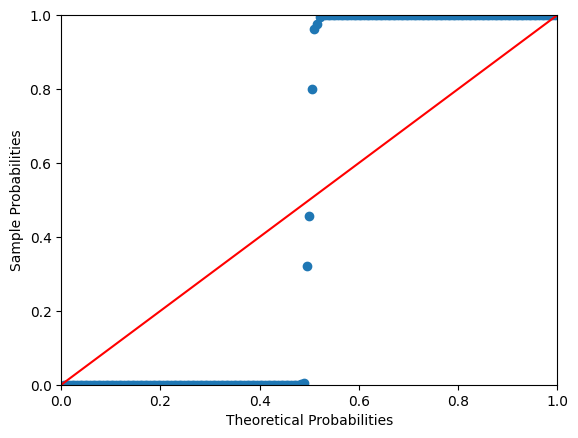

In [45]:
sm.ProbPlot(data_OLS.resid).ppplot(line = '45')
plt.show()

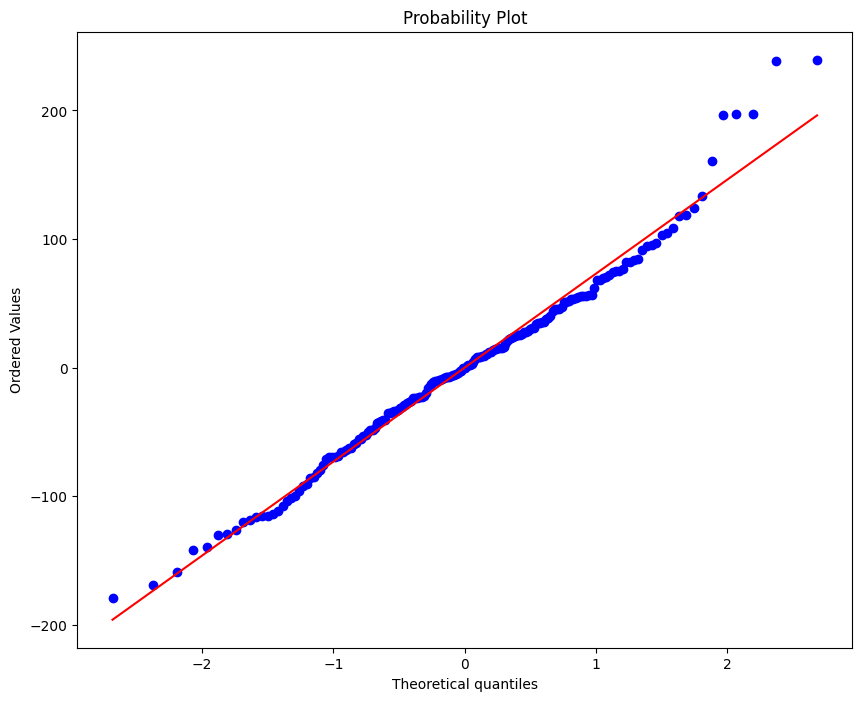

In [46]:
plt.figure(figsize=(10,8))
stats.probplot(data_OLS.resid, dist = 'norm', plot = plt)
plt.show()



*   The residuals almost follow normal distribution



**Variance of residuals - Test for homoscedasticity**

In [47]:
def get_standardised_values(values):
    return (values - values.mean())/values.std()

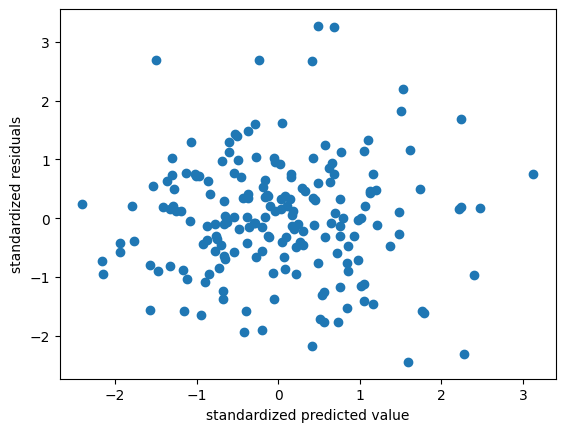

In [48]:

plt.scatter(get_standardised_values(data_OLS.fittedvalues), get_standardised_values(data_OLS.resid))
plt.xlabel('standardized predicted value')
plt.ylabel('standardized residuals')
plt.show()



*   The graph shows homoscedasticity, ie the variance of residues are constant


**OUTLIER ANALYSIS**

 *z score analysis*

In [49]:
data['z_score'] = zscore(data['Brain Weight(grams)'])
data[(data['z_score'] > 3.0)|(data['z_score'] < -3.0)]

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams),z_score




* There are no outliers



*Cooks distance*

Text(0, 0.5, 'Cooks distance')

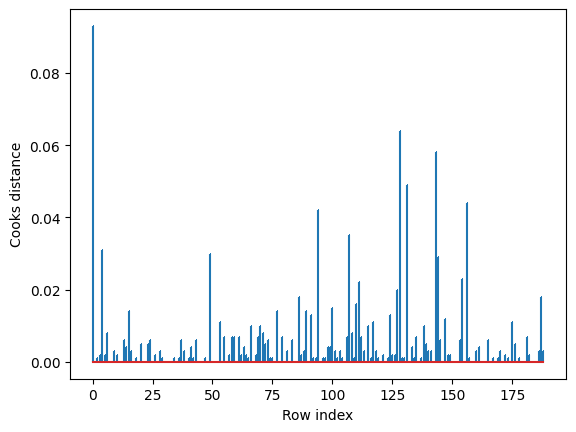

In [50]:
data_influence = data_OLS.get_influence()
(c,p) = data_influence.cooks_distance
plt.stem(np.arange(len(train_x)),
         np.round(c,3),
         markerfmt = ',')
plt.xlabel('Row index')
plt.ylabel('Cooks distance')



*   Not any point is greater than 1
*   no outliers



*Leverage value (based on Mahalanobis distance)*

Text(0, 0.5, 'studentized residuals')

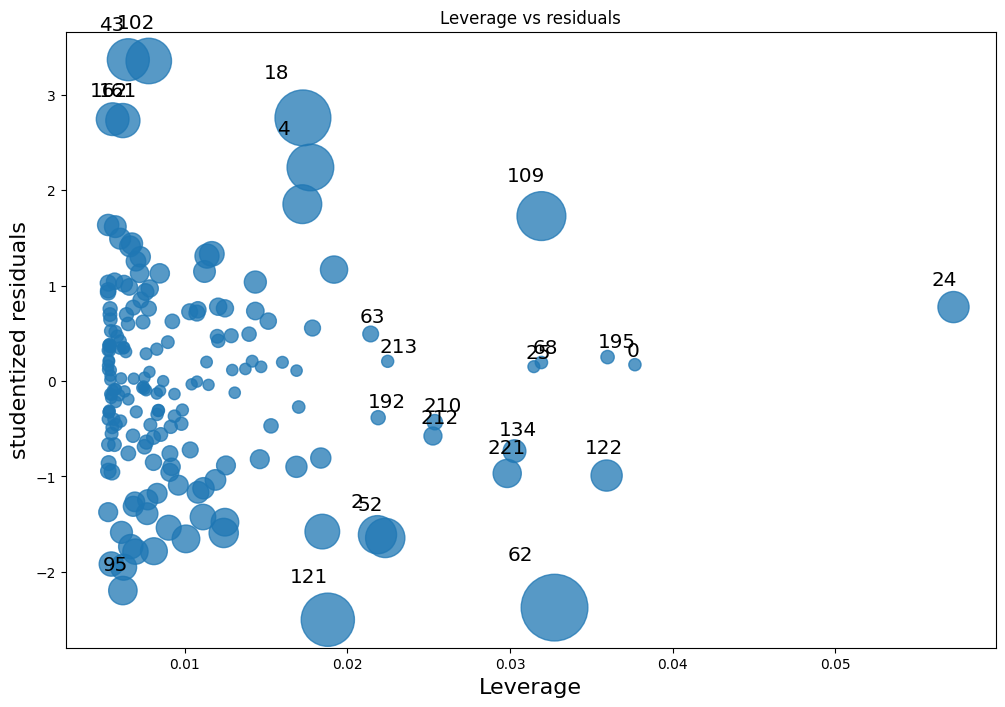

In [51]:
fig, ax = plt.subplots(figsize=(12,8))
influence_plot(data_OLS, ax = ax)
plt.title('Leverage vs residuals')
plt.xlabel('Leverage')
plt.ylabel('studentized residuals')



*   43 and 102, potential outliers



**Prediction**

In [52]:
y_pred = data_OLS.predict(test_x)

**Measuring prediction accuracy**

*  R square
*  RMSE

In [53]:
np.abs(r2_score(test_y, y_pred))

np.float64(0.6887976995086569)

*  the model explains approximately 68% of the variance in the validation set

In [54]:
np.sqrt(mean_squared_error(test_y, y_pred))

np.float64(68.91391804194137)

* smaller value, better fit

In [61]:
y_pred = data_OLS.predict(test_x)
prstd, pred_y_low, pred_y_high = wls_prediction_std(data_OLS,
                           test_x,
                           alpha = 0.1)

y_pred_df = pd.DataFrame({'head size': test_x['Head Size(cm^3)'],
                          'y_pred': y_pred,
                          'pred_y_left': pred_y_low,
                          'pred_y_right': pred_y_high})


In [62]:
y_pred_df[0:10]

,head size,y_pred,pred_y_left,pred_y_right
69,4381,1483.042627,1360.036441,1606.048814
202,3277,1191.169466,1069.258989,1313.079943
64,3727,1310.139505,1188.521329,1431.757680
96,3473,1242.987527,1121.329750,1364.645305
218,3268,1188.790065,1066.863355,1310.716776
184,3479,1244.573794,1122.920705,1366.226884
189,3703,1303.794436,1182.186442,1425.402429
198,3493,1248.275085,1126.632227,1369.917942
75,3394,1222.101676,1100.365272,1343.838080
156,3279,1191.698222,1069.791297,1313.605147
